# SYSTEM THREAT FORECASTER
- The purpose of this project is to build a prediction model to predict the chances of a machine getting infected by malwares
- The various characteristics of machines are given in datasets which would be essential for building the prediction model
- The train dataset contains all the characteristics (features) and the label column (infected or not infected)
- Label 1 indicates the machine is infected and 0 indicates not infected by malwares
- The test dataset contains only the characteristics (features), and the prediction model is supposed to predict the labels
- The project is based on Binary Classification Problem

# IMPORTING LIBRARIES
- The very first step should be to import the libraries that would be essential for the purpose of the project
- All the libraries are imported in one single cell at the very beginning of the code in order to avoid any confusion or cluttering in the intermediate steps
- The essential libraries that has been used in this piece of code are as follows :
  - Numpy : For dealing with arrays and some mathematical operations
  - Pandas : For using pandas dataframe for the convinience and compatibility
  - Matplotlib : For visualisation purposes
  - Seaborn : For further visualisation purposes
  - Scipy : For statistical models and functions
  - Sklearn : For preprocessing, feature engineering, model training, hyper-parameter tuning, model prediction
  - XGBoost : For using the XGBoost Classifier as a probable training and prediction model
  - LightGBM : For using the LightGBM Classifier as a probable training and prediction model
  - Warnings : For suppressing unnecessary warnings in our code and to maintain cleanliness during execution

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,uniform,loguniform, randint
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold,RFECV
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoCV, LogisticRegression, LinearRegression, SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, roc_auc_score 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, RandomForestRegressor,IsolationForest,HistGradientBoostingClassifier,VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASETS
- We are provided with two datasets - train and test
- We will load train dataset in df_train and test dataset in df_test
- df_train will be used for training and evaluation of models
- df_test will only be used to predict its labels
- It is observed that there are 75 features in total in both df_train and df_test
- df_train has an additional column which is the label column

In [2]:
#Loading the datasets
df_train=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
df_test=pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
print("Shape of the dataset using which we will train and validate models :",df_train.shape)
print("Shape of the dataset for which we will make predictions :",df_test.shape)
#Displaying first 5 rows to get an idea of the features and target
df_train.head()

Shape of the dataset using which we will train and validate models : (100000, 76)
Shape of the dataset for which we will make predictions : (10000, 75)


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


# FEATURE MATRIX AND TARGET COLUMN SEPARATION
- Since df_train has 75 features and a label column, it is important to separate them out into X and y
- X will be the feature matrix of 75 features
- y will be the label column
- The column named "target" is our label column that will be stored in y

In [3]:
#Separating out features and target from train dataset
X=df_train.drop(columns=["target"])
y=df_train["target"]
print("Shape of feature matrix X:",X.shape)
print("Shape of target column y:",y.shape)

Shape of feature matrix X: (100000, 75)
Shape of target column y: (100000,)


# EXPLORATORY DATA ANALYSIS (EDA)
- Exploratory data analysis helps in getting an idea of the data
- The distribution of data, measure of central tendencies and spread, null values, feature importances, etc. are all revealed in EDA
- It is the first step of a machine learning project and guides in deciding the neccesary techniques for preprocessing, feature engineering and model selections
- Here, EDA has been performed broadly in four stages
  - Stage 1 : General EDA - An overall view of the data
  - Stage 2 : Numerical EDA - Analysis of numerical columns
  - Stage 3 : Categorical EDA - Analysis of categorical columns
  - Stage 4 : Hypothesis Testing - Significance testing of proposed hypothesis

## 1. General Exploratory Data Analysis
- A. Target Column Distribution Analysis
- B. Non-Null and Datatype Analysis
- C. Numerical, Categorical and Date Analysis
- D. Feature-wise Null Count and Missing Value Analysis

### A. Target Column Distribution Analysis
- Let us first analyse whether the target is balanced or not
- A balanced target dataset will produce unbiased results
- If datasets are found to be imbalanced, models may be prone to predicting the category that is in surplus
- We will construct a pie-chart to observe the distribution of target in our train dataset

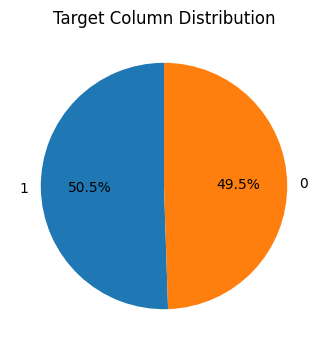

In [4]:
#Checking whether dataset is balanced or imbalanced in terms of target column distribution
count=y.value_counts()
plt.figure(figsize=(4,4))
plt.title("Target Column Distribution")
plt.pie(count,labels=count.index,autopct="%1.1f%%",startangle=90)
plt.show()

### Inference
- The dataset has 50.5% of datapoints labeled as 1 (Infected by malware)
- The dataset has 49.5% of datapoints labeled as 0 (Not infected by malware)
- The distribution of 1's and 0's are almost equal
- Hence, the dataset can be considered to be more or less, balanced
- Synthetic generation of samples not required

### B. Non-Null and Datatype Analysis
- .info() gives the whole list of all the features
- It also gives the number of non-null count in each feature
- It also gives the datatype of each feature

In [5]:
#Displaying detailed information about the features like their data types and non-null value counts
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

### Inference
- Non-null count are varying from actual number of datapoints, indicating presence of nulls in data
- There are 31 float, 16 int and 28 object datatype features
- While at first glance it might appear that the float and int features are numerical and object features are categorical, that is not true
- On a closer inspection, it was found that many of the int and float features are actually categorical
- We will manually separate out 3 types of features - numerical, categorical and datetype only for the correctness of the EDA

### C. Numerical, Categorical and Date Analysis
- On close manual inspection, it was found that only the following are the truly numerical features
  - 'NumAntivirusProductsInstalled'
  - 'NumAntivirusProductsEnabled'
  - 'ProcessorCoreCount'
  - 'PrimaryDiskCapacityMB'
  - 'SystemVolumeCapacityMB'
  - 'TotalPhysicalRAMMB'
  - 'PrimaryDisplayDiagonalInches'
  - 'PrimaryDisplayResolutionHorizontal'
  - 'PrimaryDisplayResolutionVertical'
  - 'InternalBatteryNumberOfCharges'
- Only the following two features are datetype
  - 'DateAS'
  - 'DateOS'
- All the rest of the features, even though some are int and float type, are actually categorical
- We will separate out these features for further analysis
- <strong>IMPORTANT NOTE : Since several categorical features are already in numerical form, and during preprocessing we will have to keep all the features in numerical form as it is for compatibility with model training anyways, we will preprocess them like numerical features itself. Only the categorical features that are of object type will be preprocessed like actual categorical features. The separation of categorical and numerical features has been performed only for the purpose of proper EDA</strong>

In [6]:
#Separating out the names of numerical, categorical and date-time features for EDA
numerical_columns=['NumAntivirusProductsInstalled','NumAntivirusProductsEnabled','ProcessorCoreCount','PrimaryDiskCapacityMB','SystemVolumeCapacityMB',
                  'TotalPhysicalRAMMB','PrimaryDisplayDiagonalInches','PrimaryDisplayResolutionHorizontal','PrimaryDisplayResolutionVertical',
                   'InternalBatteryNumberOfCharges']
date_columns=['DateAS','DateOS']
categorical_columns=[col for col in X.columns if col not in numerical_columns+date_columns]
print("Number of truly numerical columns :",len(numerical_columns))
print("Number of date-time columns :",len(date_columns))
print("Number of truly categorical columns :",len(categorical_columns))

Number of truly numerical columns : 10
Number of date-time columns : 2
Number of truly categorical columns : 63


### Inference
- There are 10 numerical columns and there names are stored in list "numerical_columns"
- There are 2 date-time columns and there names are stored in list "date_columns"
- There are 63 categorical columns and there names are stored in list "categorical_columns"
- Let us create a copy of X for the purpose of EDA and name it as X_eda
- Let us simply set datatypes of the categorical columns as 'category' to avoid any confusion
- Let us also set datatype of the date-time columns as pandas datetime type

In [7]:
#Convert the categorical columns to dtype category and date-time to dtype datetime to avoid confusion
X_eda=X.copy(deep=True)
X_eda[categorical_columns]=X[categorical_columns].astype('category')
X_eda[date_columns]=X[date_columns].apply(pd.to_datetime)

### D. Feature-wise Null Count and Missing Value Analysis
- Nulls can significantly hamper the performance of our models
- It is important to identify the number of null and missing values present in each feature
- We will check null values using .isnull().sum()
- We will also check presence of other types of missing values in our datatypes
- We will also calculate the percentage of null values in each feature to decide whether to remove or to impute

In [8]:
#Identifying missing values and null counts
nulls=X_eda.isnull().sum()
other_missings=X_eda.isin(['NA','N/A','-','',' ','?']).sum()
missing_percentage=((nulls+other_missings)/X_eda.shape[0])*100
missing=pd.concat([nulls,other_missings,missing_percentage],axis=1)
missing.columns = ['Null Count','Other Types of Missing Count','Percentage of missing values']
pd.set_option('display.max_rows',None)
missing

,Null Count,Other Types of Missing Count,Percentage of missing values
MachineID,0,0,0.000
ProductName,0,0,0.000
EngineVersion,0,0,0.000
AppVersion,0,0,0.000
SignatureVersion,0,0,0.000
IsBetaUser,0,0,0.000
RealTimeProtectionState,66,0,0.066
IsPassiveModeEnabled,0,0,0.000
AntivirusConfigID,76,0,0.076
NumAntivirusProductsInstalled,76,0,0.076


### Inference
- We observe that all the features have less than 1% of null values
- The number of nulls are thus very small compared to the dataset
- We can easily use imputation techniques for these null values
- Removal of feature is not necessary as null counts are within a decent limit
- Imputation will be performed in preprocessing

### E. Duplicate Identification
- We identify whether duplicate datapoints are present or not present in our dataset
- Otherwise it might cause fome anomaly or confusion during analysis
- We may or may not have to remove duplicates, based on model performance

In [9]:
duplicates=df_train[df_train.duplicated()]
print("Number of duplicates present in training set :",duplicates.shape[0])
print("Number of unique datapoints present in training set :",df_train.shape[0]-duplicates.shape[0])

Number of duplicates present in training set : 165
Number of unique datapoints present in training set : 99835


## 2. Exploratory Data Analysis on Numerical Features
- A. Descriptive Statistics of Numerical Features
- B. Boxplot Analysis for Outlier Detection
- C. Correlation Analysis between Numerical Features
- D. Pairplot Analysis between Numerical Features

### A. Descriptive Statistics of Numerical Features

In [10]:
#Displaying summary of data for the numerical features
pd.set_option('display.float_format','{:.2f}'.format)
X_eda.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
NumAntivirusProductsInstalled,99924.00,1.33,0.52,1.00,1.00,1.00,2.00,5.00
NumAntivirusProductsEnabled,99924.00,1.02,0.16,0.00,1.00,1.00,1.00,4.00
ProcessorCoreCount,99915.00,4.01,2.03,1.00,2.00,4.00,4.00,64.00
PrimaryDiskCapacityMB,99890.00,515861.88,352562.38,12288.00,244198.00,476940.00,953869.00,7630885.00
SystemVolumeCapacityMB,99890.00,381990.47,324623.98,10880.00,120841.00,256765.50,476102.00,6630319.00
TotalPhysicalRAMMB,99849.00,6132.09,4813.88,512.00,4096.00,4096.00,8192.00,262144.00
PrimaryDisplayDiagonalInches,99928.00,16.71,6.03,5.30,13.90,15.50,17.20,142.00
PrimaryDisplayResolutionHorizontal,99928.00,1552.23,363.44,400.00,1366.00,1366.00,1920.00,7680.00
PrimaryDisplayResolutionVertical,99928.00,898.25,213.70,300.00,768.00,768.00,1080.00,3840.00
InternalBatteryNumberOfCharges,99485.00,1118068977.87,1884681908.24,0.00,0.00,0.00,4294967295.00,4294967295.00


### Inference
- Features like ProcessorCoreCount has mean of 4.01, 75th percentile as 4 but maximum as 64, clearly indicating presence of outliers
- Similar trend is visible for other features as well
- Only InternalBatteryNumberOfCharges has 75th percentile and maximum value same; its minimum values corresponds to 25th percentile; this indicates absence of outliers in this feature
- We will plot boxplots to idenitfy the outliers in the suspected features more accurately

### B. Boxplot Analysis for Outlier Detection

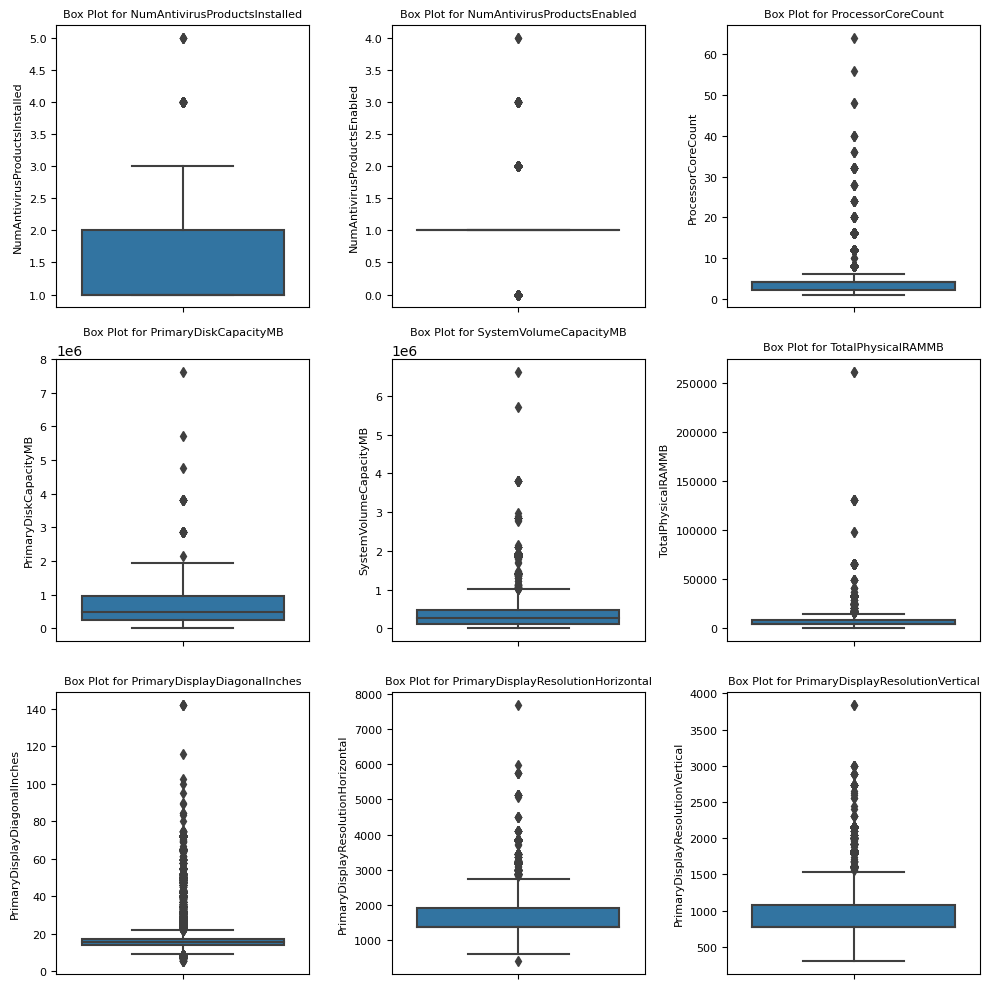

In [11]:
#Identifying outliers using box plot for numerical features that are suspected to have some outliers
outlier_columns=[col for col in numerical_columns if col !='InternalBatteryNumberOfCharges']
fig,axes=plt.subplots(3,3,figsize=(10,10))
axes=axes.flatten()
for i,col in enumerate(outlier_columns):
    sns.boxplot(y=X_eda[col],ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}',fontsize=8)
    axes[i].set_ylabel(col,fontsize=8)
    axes[i].tick_params(axis='both',labelsize=8)
plt.tight_layout()
plt.show()

### Inference
- The boxplots confirm the presence of outliers in the suspected features
- This is in accordance with our decriptive statistics
- However, certain features are observed to have too many outliers
- This raises a question whether these datapoints can be considered truly as outliers or not
- Model performances will be tested with outlier removal techniques to analyze further on this
- We will deal with outlier removal techniques in preprocessing

### C. Correlation Analysis between Numerical Features

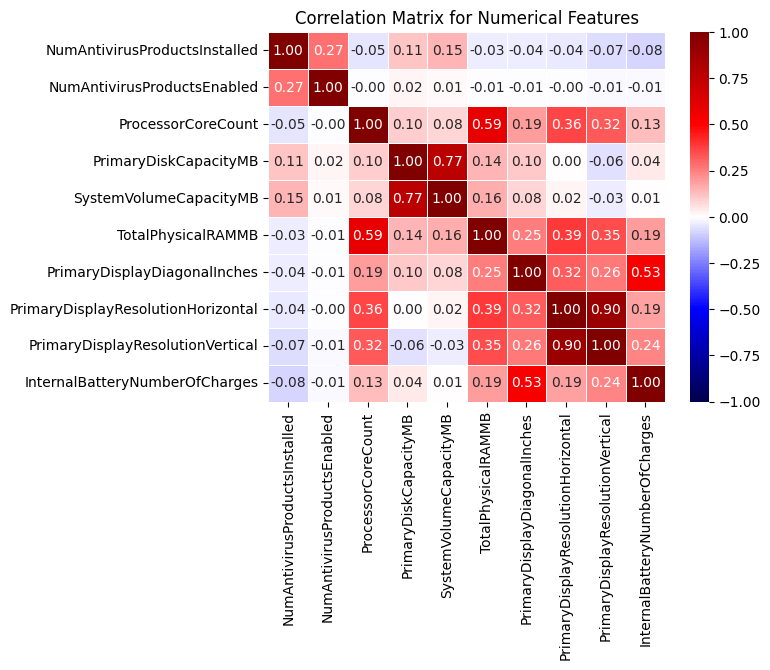

In [12]:
#Displaying correlation heatmap for numerical columns
corr_matrix=X_eda[numerical_columns].corr()
sns.heatmap(corr_matrix,cmap='seismic',fmt=".2f",linewidths=0.5,annot=True,vmin=-1,vmax=1)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

### Inference
- Very strong correlation (0.9 and above) was found between PrimaryDisplayResolutionHorizontal and PrimaryDisplayResolutionVertical
- Strong correlation (0.7 and above) was found between PrimaryDiskCapacityMB and SystemVolumeCapacityMB
- Some correlation (0.5 and above) was found between:
  - PrimaryDisplayDiagonalInches and InternalBatteryNumberOfCharges
  - ProcessorCoreCount and TotalPhysicalRAMMB
- Redundant features may be removed to improve model performance and minimize multicollinearity
- Redundant features will be dealt with during feature engineering

### D. Pairplot Analysis between Numerical Features

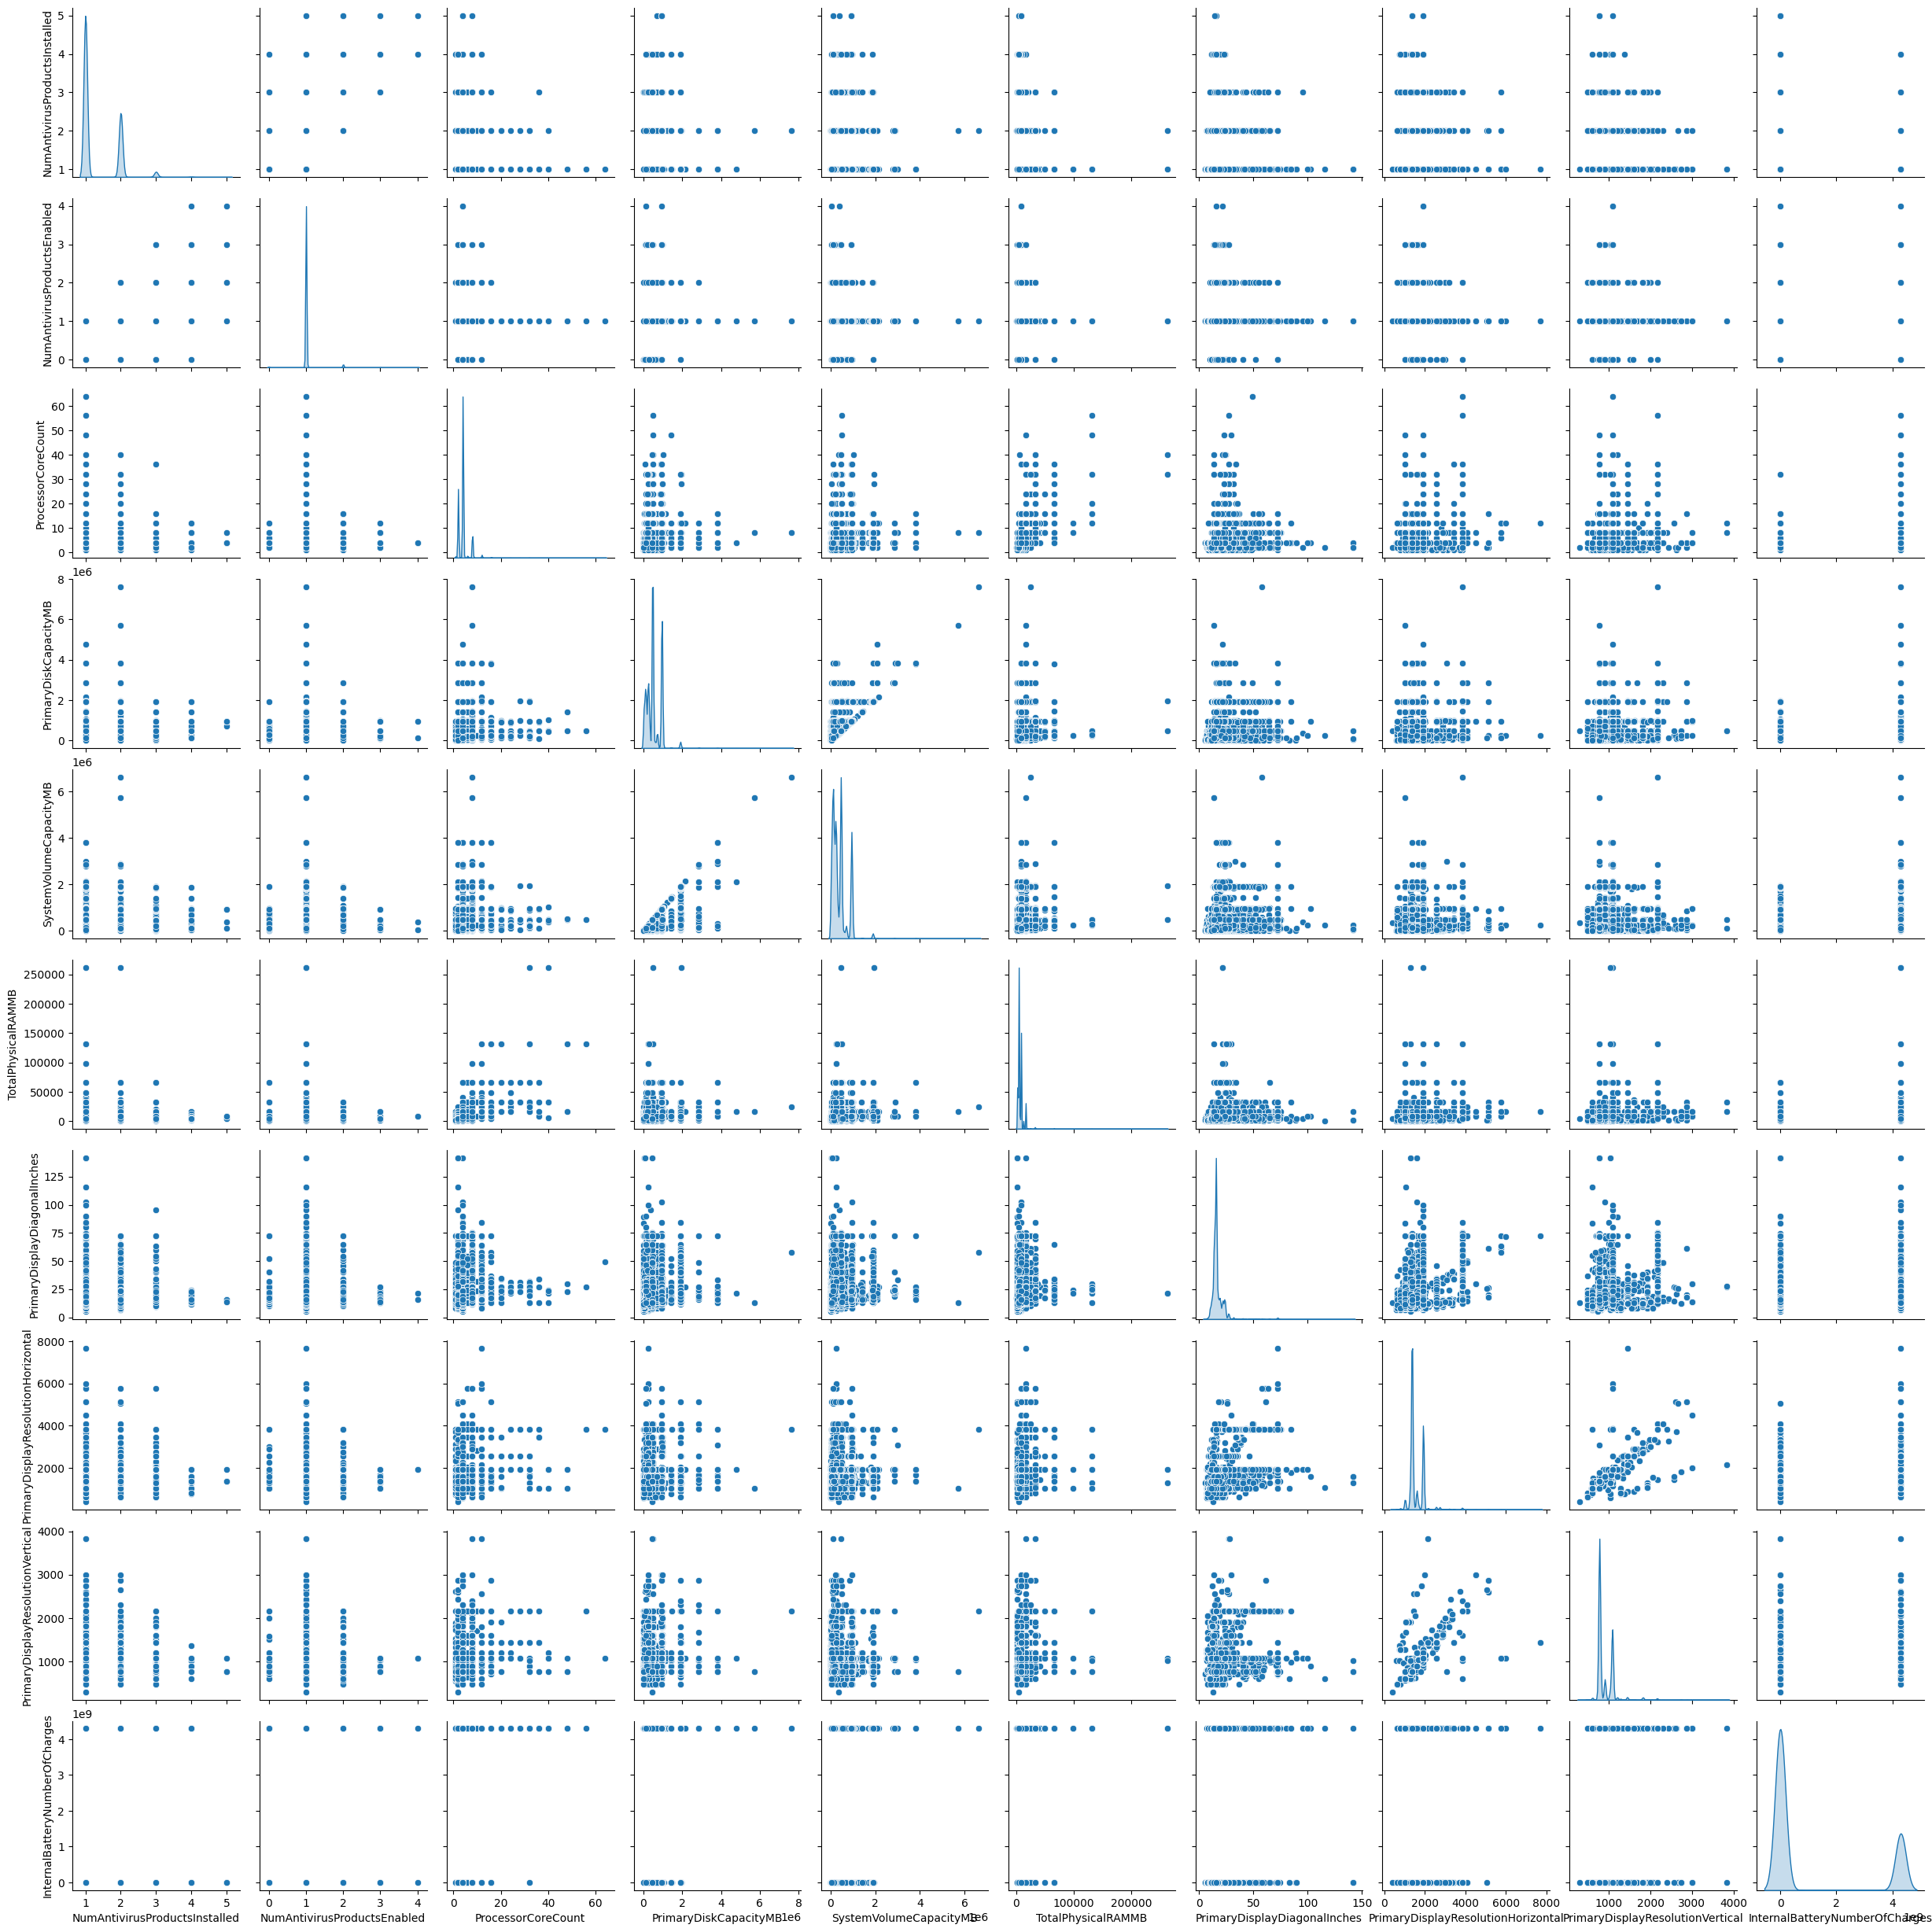

In [13]:
#Plotting pairplots for numerical features that are involved in high correlations
sns.pairplot(X_eda[numerical_columns],diag_kind='kde')
plt.show()

### Inference
- Linearity in scatter plots are observed between the following features
  - PrimaryDiskCapacityMB and SystemVolumeCapacityMB
  - PrimaryDisplayResolutionHorizontal and PrimaryDisplayResolutionVertical
- Presence of far away points indicate potential outliers
- Since most feature pairs do not show any linear trend, this could potentially mean that dataset is not linear and linear algorithms may not perform well for this dataset
- The diagonals also represent the distribution of the features as KDE (Kernal Density Estimate)
- The peaks in KDE are where most of the points appear

## 3. Exploratory Analysis on Categorical Features
- A. Summary of Categorical Features
- B. Pie Chart Analysis of Binary Features
- C. Bar Chart Analysis of Object Features
- D. Analysis of Features vs Target

### A. Summary of the Categorical Features

In [14]:
#Displaying summary of the data for the categorical columns
X_eda.describe(include=["category"]).T

,count,unique,top,freq
MachineID,100000,99835,e614912c6fbfb36e0ffcd471fb759c2a,2
ProductName,100000,2,win8defender,99771
EngineVersion,100000,37,1.1.15200.1,45219
AppVersion,100000,69,4.18.1807.18075,62119
SignatureVersion,100000,2735,1.273.1420.0,1274
IsBetaUser,100000,1,0,100000
RealTimeProtectionState,99934.00,6.00,7.00,97375.00
IsPassiveModeEnabled,100000,2,0,98238
AntivirusConfigID,99924.00,1976.00,53447.00,66639.00
HasTpm,100000,2,1,99678


### Inference
- There is a feature MachineID which is unique for every different datapoint
- There are few features like AutoSampleSubmissionEnabled, IsBetaUser and IsFlightDisabled which only have 1 unique value
- We will deal with these features during feature engineering
- Many features have missing values as is visible from count

### B. Pie Chart Analysis for Binary Features

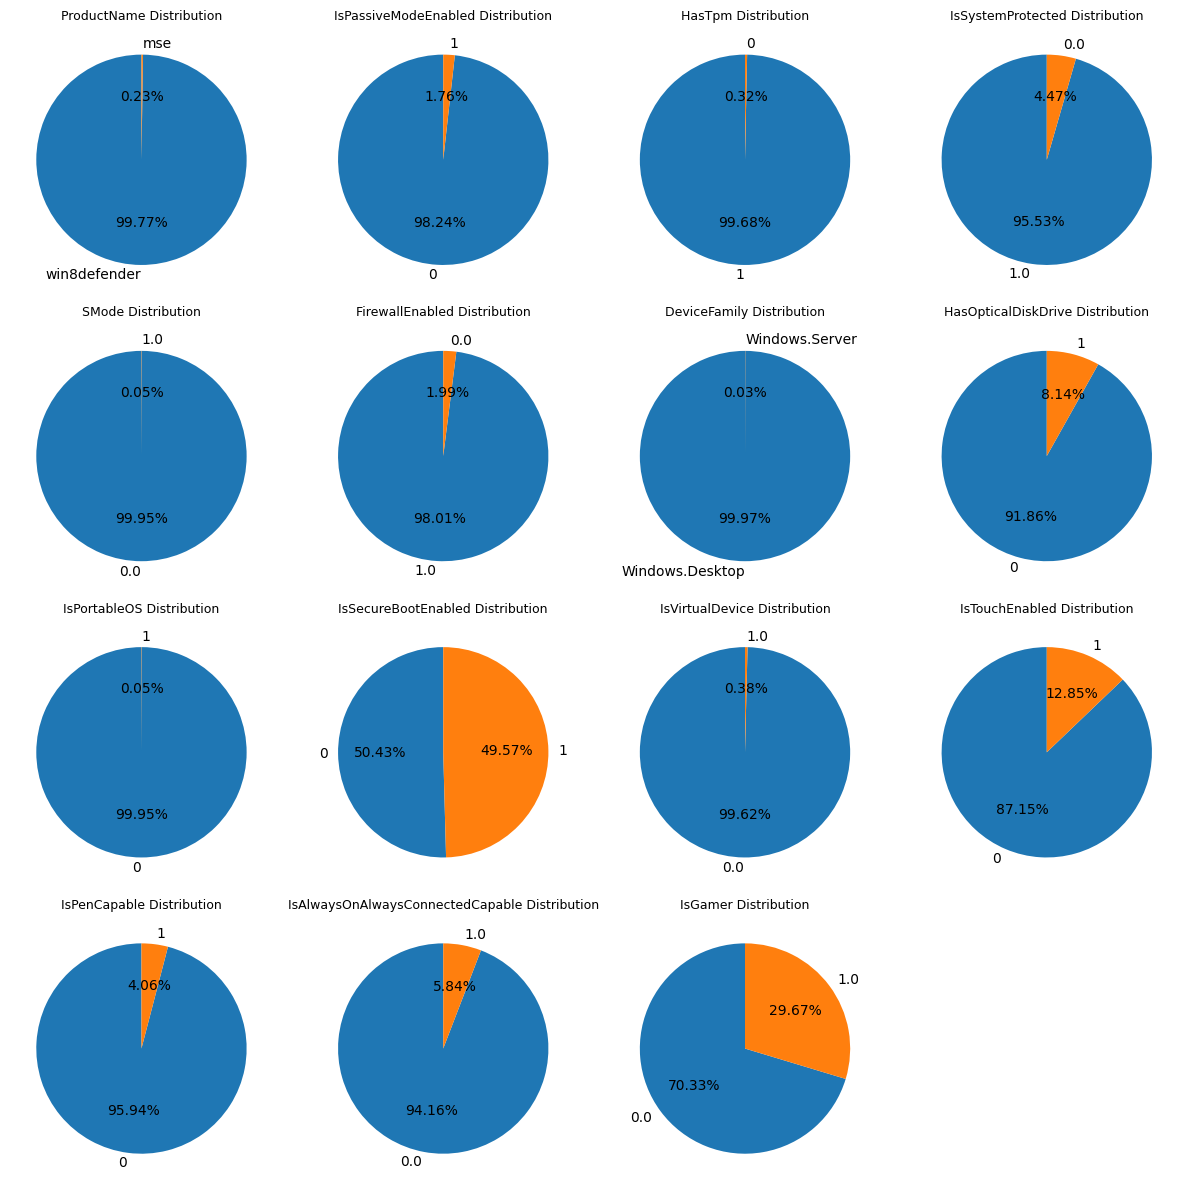

In [15]:
#Pie Charts for categorical columns with only 2 unique categories
bin_features=[col for col in categorical_columns if X_eda[col].nunique()==2]
fig,axes=plt.subplots(4,4,figsize=(12,12))
axes=axes.flatten()
for i,feature in enumerate(bin_features):
    count=X_eda[feature].value_counts()
    axes[i].pie(count,labels=count.index,autopct="%1.2f%%",startangle=90)
    axes[i].set_title(f'{feature} Distribution',fontsize=9)
for j in range(i+1,len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

### Inference
- We observe that IsSecureBootEnabled is balanced for both the categories
- All other features have dominance of one particular category over the other
- Features like ProductName, HasTPM, SMode, DeviceFamily, IsPortableOS and ISVirtualDevice are almost completely one category dominated and produce low variability in data

### C. Bar Chart Analysis of Object Features

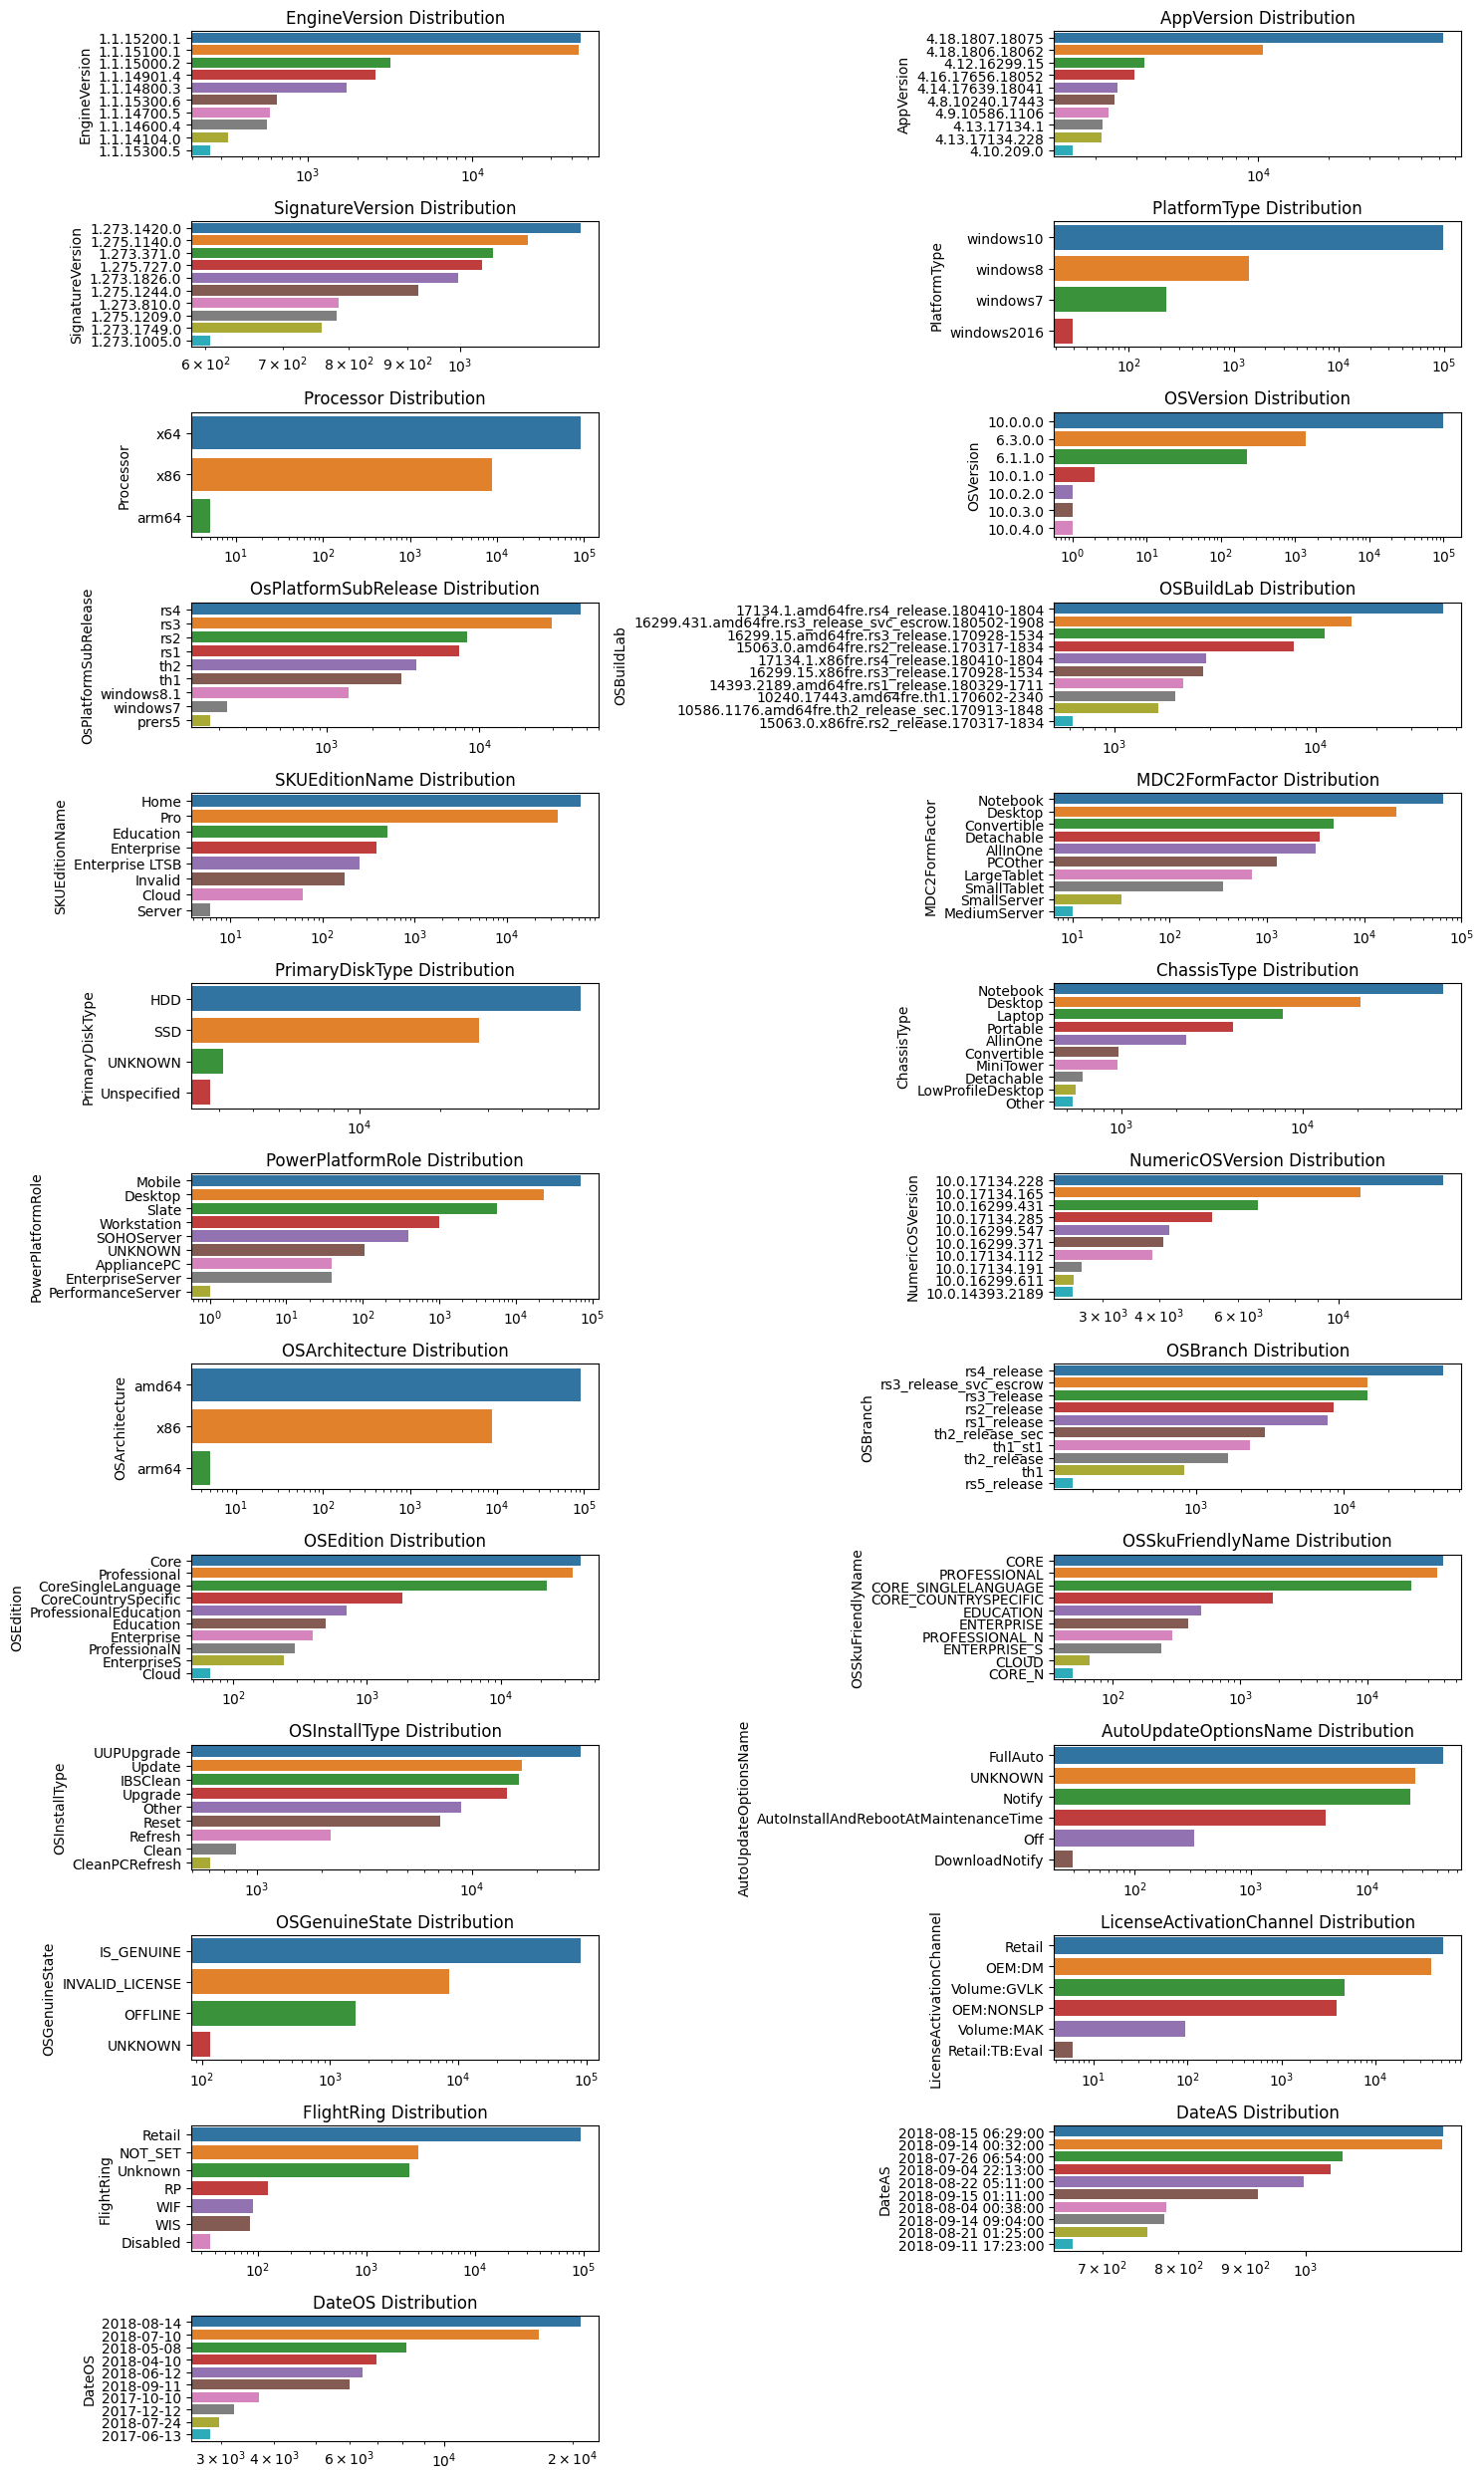

In [16]:
#Barplots for features that were of object type (upto 10 unique categories)
object_features=X.select_dtypes(include='object').columns
object_features=[col for col in object_features if col not in bin_features and col!='MachineID']
fig,axes=plt.subplots(13,2,figsize=(15,25))
axes=axes.flatten()
for i,feature in enumerate(object_features):
    count=X[feature].value_counts().head(10)
    sns.barplot(x=count.values,y=count.index,order=count.index,ax=axes[i])
    axes[i].set_xscale('log')
    axes[i].set_title(f'{feature} Distribution')
for j in range(i+1,len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

### Inference
- Huge number of categorical features are present in the dataset
- Many of the categorical features have very high cardinality
- Hence, it is computationally expensive to plot and analyse bar charts of all such features
- We will only analyse the bar charts for features that were already of object type for upto top 10 features
- From the bar charts we observe that many of the features are dominated by the top 2 or 3 categories
- This is in accordance with the Pareto Principle that states that 80% outcomes are caused by only 20% of the causes

### D. Analysis of Features with Target
- Let us analyse the distributions of certain features in terms of the target count
- This will give us detailed understanding of these features

### UNDERSTANDING SECURE BOOT

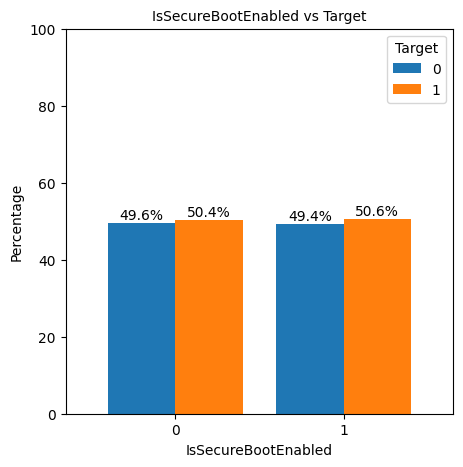

In [17]:
percentage_df=df_train.groupby('IsSecureBootEnabled')['target'].value_counts(normalize=True).unstack()*100
ax=percentage_df.plot(kind='bar',figsize=(5,5),width=0.8)
for container in ax.containers:
    ax.bar_label(container,fmt="%.1f%%",label_type='edge',fontsize=10)
plt.xlabel("IsSecureBootEnabled",fontsize=10)
plt.ylabel("Percentage",fontsize=10)
plt.title("IsSecureBootEnabled vs Target",fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Target",labels=[0,1])
plt.ylim(0,100) 
plt.show()

#### Inference : 
- The target distribution is almost equal for both Secure Boot enabled and disabled
- Malware infection seems to be eqally likely whether or not secure boot is enabled

### UNDERSTANDING PROCESSORS

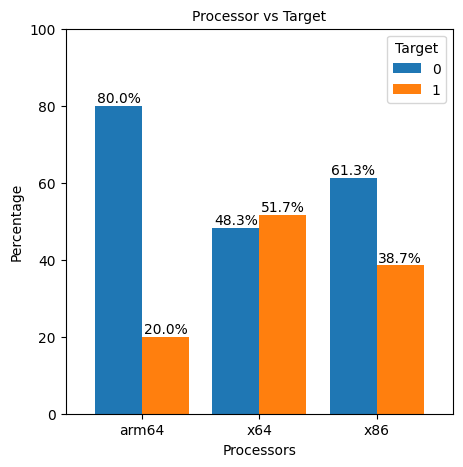

In [18]:
percentage_df=df_train.groupby('Processor')['target'].value_counts(normalize=True).unstack()*100
ax=percentage_df.plot(kind='bar',figsize=(5,5),width=0.8)
for container in ax.containers:
    ax.bar_label(container,fmt="%.1f%%",label_type='edge',fontsize=10)
plt.xlabel("Processors",fontsize=10)
plt.ylabel("Percentage",fontsize=10)
plt.title("Processor vs Target",fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Target",labels=[0,1])
plt.ylim(0,100) 
plt.show()

#### Inference : 
- Most of the systems of arm64 are not infected by malware
- x86 also seems relatively safe from malwares
- x64 seems to have a slightly more risk of infecting malwares

### UNDERSTANDING OPERATING SYSTEM ARCHITECTURES

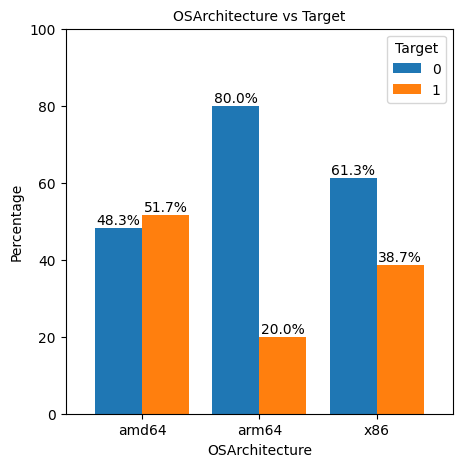

In [19]:
percentage_df=df_train.groupby('OSArchitecture')['target'].value_counts(normalize=True).unstack()*100
ax=percentage_df.plot(kind='bar',figsize=(5,5),width=0.8)
for container in ax.containers:
    ax.bar_label(container,fmt="%.1f%%",label_type='edge',fontsize=10)
plt.xlabel("OSArchitecture",fontsize=10)
plt.ylabel("Percentage",fontsize=10)
plt.title("OSArchitecture vs Target",fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Target",labels=[0,1])
plt.ylim(0,100) 
plt.show()

#### Inference
- amd64 seems to be slightly riskier to be malware infected
- arm64 is mostly safe from malwares
- x86 is also relatively safe

### EXPLORING PLATFORM TYPE

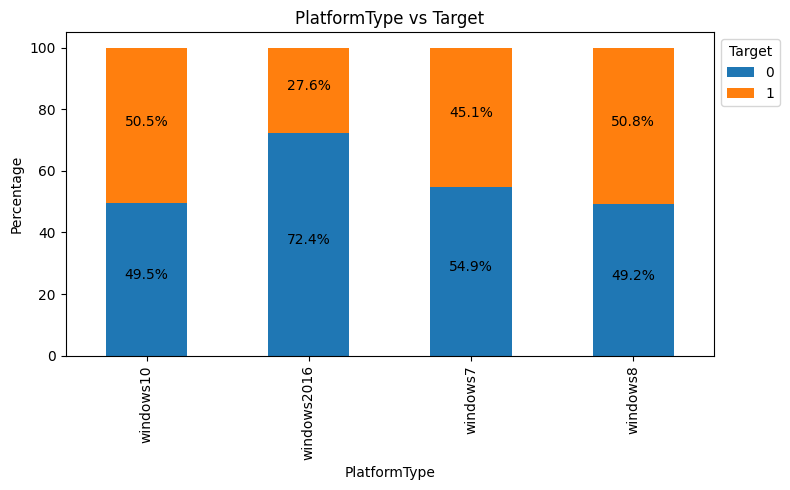

In [20]:
crosstab=pd.crosstab(df_train['PlatformType'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='bar',stacked=True,figsize=(8,5))
ax.set_ylabel('Percentage')
ax.set_xlabel('PlatformType')
ax.set_title('PlatformType vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,platform in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[platform,0]
    target_1_percentage=crosstab.loc[platform,1]
    ax.text(i,target_0_percentage/2,f'{target_0_percentage:.1f}%',ha='center')
    ax.text(i,target_0_percentage+target_1_percentage/2,f'{target_1_percentage:.1f}%',ha='center')
plt.tight_layout()
plt.show()

### Inference
- Windows10 has a slightly more number of infected machines
- Windows2016 seems to be relatively safe in terms of malware infections
- Windows7 is slightly on the safer side
- Windows8 has similar results as of Windows10

### EXPLORING PRIMARY DISK TYPE

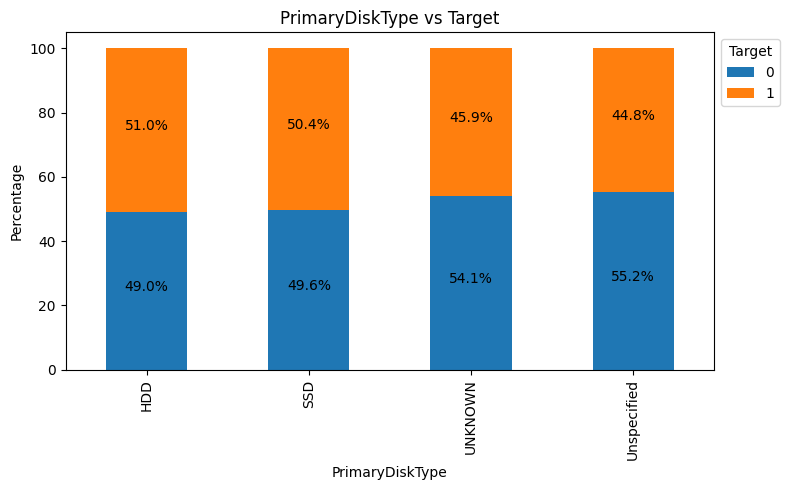

In [21]:
crosstab=pd.crosstab(df_train['PrimaryDiskType'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='bar',stacked=True,figsize=(8,5))
ax.set_ylabel('Percentage')
ax.set_xlabel('PrimaryDiskType')
ax.set_title('PrimaryDiskType vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,disk in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[disk,0]
    target_1_percentage=crosstab.loc[disk,1]
    ax.text(i,target_0_percentage/2,f'{target_0_percentage:.1f}%',ha='center')
    ax.text(i,target_0_percentage+target_1_percentage/2,f'{target_1_percentage:.1f}%',ha='center')
plt.tight_layout()
plt.show()

#### Inference
- HDD and SSD has an almost equal split with infected being slighlty in excess
- The Unknown and Unspecified disks have slightly lesser number of infected 

### EXPLORING OPERATING SYSTEM GENERIC STATE

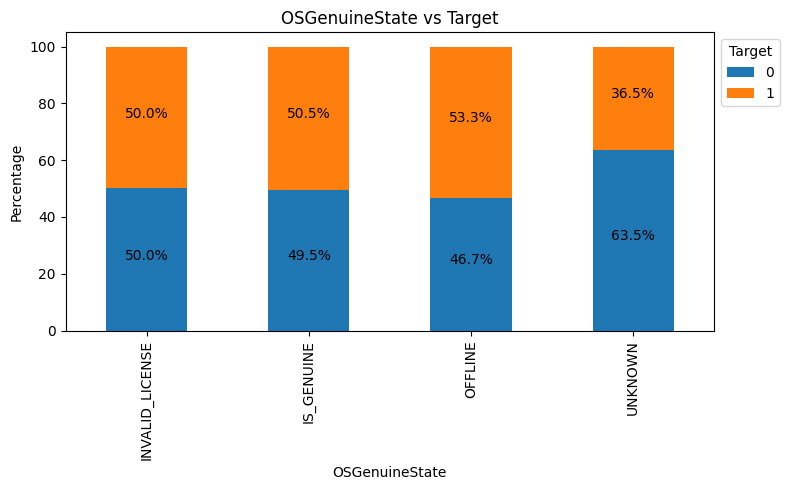

In [22]:
crosstab=pd.crosstab(df_train['OSGenuineState'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='bar',stacked=True,figsize=(8,5))
ax.set_ylabel('Percentage')
ax.set_xlabel('OSGenuineState')
ax.set_title('OSGenuineState vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,os in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[os,0]
    target_1_percentage=crosstab.loc[os, 1]
    ax.text(i,target_0_percentage/2,f'{target_0_percentage:.1f}%',ha='center')
    ax.text(i,target_0_percentage+target_1_percentage/2,f'{target_1_percentage:.1f}%',ha='center')
plt.tight_layout()
plt.show()

#### Inference
- Invalid license and Genuine license have an almost equal split between infected and not infected
- Offline OS has a slighly more chance of getting infected
- Unknowns have lower chances of getting infected

### INVESTIGATING SKU EDITION NAME

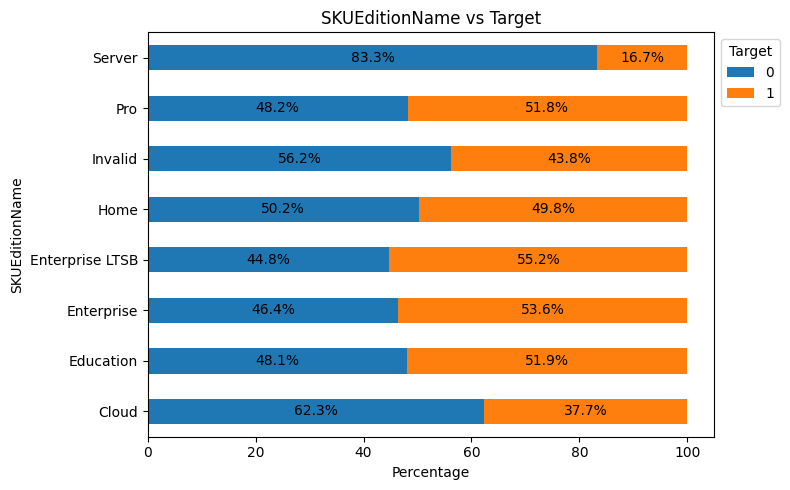

In [23]:
crosstab=pd.crosstab(df_train['SKUEditionName'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='barh',stacked=True,figsize=(8,5))
ax.set_ylabel('SKUEditionName')
ax.set_xlabel('Percentage')
ax.set_title('SKUEditionName vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,sku in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[sku,0]
    target_1_percentage=crosstab.loc[sku,1]
    ax.text(target_0_percentage/2,i,f'{target_0_percentage:.1f}%',ha='center',va='center')
    ax.text(target_0_percentage+target_1_percentage/2,i,f'{target_1_percentage:.1f}%',ha='center',va='center')
plt.tight_layout()
plt.show()

#### Inference
- Server, Invalid, Home and Cloud seems to be on the safer side
- Pro, Enterprise LTSB, Enterprise and Education seems to be on the riskier side

### INVESTIGATING MDC2 FORM FACTOR

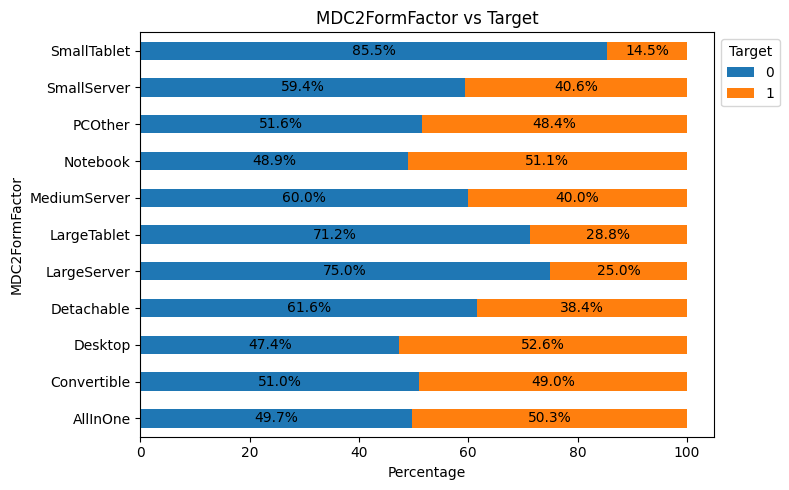

In [24]:
crosstab=pd.crosstab(df_train['MDC2FormFactor'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='barh',stacked=True,figsize=(8,5))
ax.set_ylabel('MDC2FormFactor')
ax.set_xlabel('Percentage')
ax.set_title('MDC2FormFactor vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,mdc in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[mdc,0]
    target_1_percentage=crosstab.loc[mdc,1]
    ax.text(target_0_percentage/2,i,f'{target_0_percentage:.1f}%',ha='center',va='center')
    ax.text(target_0_percentage+target_1_percentage/2,i,f'{target_1_percentage:.1f}%',ha='center',va='center')
plt.tight_layout()
plt.show()

#### Inference
- SmallTablet, SmallServer,PCOther, MediumServer, LargeTablet, LargeServer, Detachle, Convertible are on the safer side
- Notebook, Dekstop and AllInOne are on the riskier side

### INVESTIGATING CHASSIS TYPE

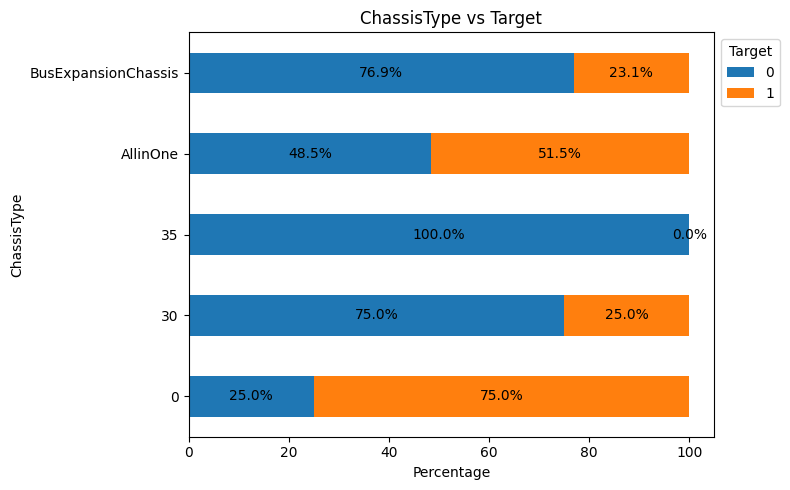

In [25]:
crosstab=pd.crosstab(df_train['ChassisType'],df_train['target'],normalize='index').head()*100
ax=crosstab.plot(kind='barh',stacked=True,figsize=(8,5))
ax.set_ylabel('ChassisType')
ax.set_xlabel('Percentage')
ax.set_title('ChassisType vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,chasis in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[chasis,0]
    target_1_percentage=crosstab.loc[chasis, 1]
    ax.text(target_0_percentage/2,i,f'{target_0_percentage:.1f}%',ha='center',va='center')
    ax.text(target_0_percentage+target_1_percentage/2,i,f'{target_1_percentage:.1f}%',ha='center',va='center')
plt.tight_layout()
plt.show()

#### Inference
- 0 seems to be highly risky
- AllinOne is slightly risky
- Rest are relatively on the safer side
- 35 seems to be the safest

### INVESTIGATING POWER PLATFORM ROLE

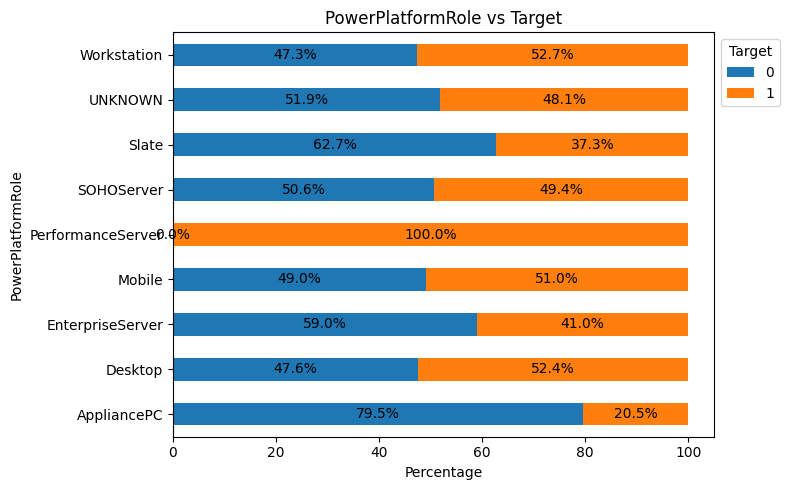

In [26]:
crosstab=pd.crosstab(df_train['PowerPlatformRole'],df_train['target'],normalize='index')*100
ax=crosstab.plot(kind='barh',stacked=True,figsize=(8,5))
ax.set_ylabel('PowerPlatformRole')
ax.set_xlabel('Percentage')
ax.set_title('PowerPlatformRole vs Target')
ax.legend(title='Target',labels=[0,1],bbox_to_anchor=(1,1),loc='upper left')
for i,platform in enumerate(crosstab.index):
    target_0_percentage=crosstab.loc[platform,0]
    target_1_percentage=crosstab.loc[platform,1]
    ax.text(target_0_percentage/2,i,f'{target_0_percentage:.1f}%',ha='center',va='center')
    ax.text(target_0_percentage+target_1_percentage/2,i,f'{target_1_percentage:.1f}%',ha='center',va='center')
plt.tight_layout()
plt.show()

#### Inference
- Workstation, Mobile and Dekstop are on the riskier side
- PerformanceServer seems to be the most riskiest
- Rest seems to be on the safer side

## 4. Hypothesis Testing

In [27]:
#Identifying features that are significant at a significance level of 5% using chi-square testing
significant=[]
insignificant=[]
for col in X.columns:
        contingency=pd.crosstab(X[col],y)
        chi2,p,dof,expected=chi2_contingency(contingency)
        if p<0.05:
            significant.append(col)
        else:
            insignificant.append(col)
print("Significant features :",significant)
print("Insignificant features :",insignificant)

Significant features : ['EngineVersion', 'AppVersion', 'SignatureVersion', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'PlatformType', 'Processor', 'OSBuildNumber', 'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'PowerPlatformRole', 'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallTy

### Inference
- The significant feature names at 5% level of significance are stored in list significant
- The insignificant feature names at 5% level of significance are stored in list insignificant
- The insignificant features may not produce much effect to our models
- Further insights can be drawn during feature engineering and extraction

# DATA PREPROCESSING AND FEATURE ENGINEERING
- 1. Train-Validation Split
- 2. Introducing feature_is_missing Columns
- 3. Imputation, Encoding and Scaling
- 4. Outlier removal

## 1. Splitting The Dataset Into Train and Validation Sets
Train set can be used for model training and validaiton set will help in evaluating the performance of our models

In [28]:
#Train-validation split
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((80000, 75), (80000,), (20000, 75), (20000,))

## 2. Introducing feature_is_missing Columns
- We create new feature that will have 0 if that row contains null in that feature else 1
- This would be some intuitive information for our models to fit

In [29]:
for col in X_train.columns:
    X_train[f"{col}_is_missing"]=X_train[col].isna().astype(int)
    X_val[f"{col}_is_missing"]=X_val[col].isna().astype(int)
    X[f"{col}_is_missing"]=X[col].isna().astype(int)
    df_test[f"{col}_is_missing"]=df_test[col].isna().astype(int)
X_train.shape,X_val.shape,X.shape,df_test.shape

((80000, 150), (20000, 150), (100000, 150), (10000, 150))

## 3. Imputation,Encoding and Scaling Pipeline

- Mean strategy is used for imputing numerical columns as it was found after experimenting multiple times that it is producing the best performance
- Mode (most_frequent) strategy is used for imputing categorical columns as mean and median may not have a meaning for categorical columns
- StandardScaler is used for scaling all the featues as it was found to be best compatible with our models
- OrdinalEncoder is used to encode categorical features
- If OrdinalEncoder encounters unknown category, it will set it to -1
- OneHotEncoder was not used as there are a lot of categories and features which might expand our feature matrix and reduce performance and efficiency
- The transformer was fit and then transformed on train set but for validation set, it was only transformed to avoid data leakages and biased results

In [30]:
numerical_columns=X_train.select_dtypes(include=["float64","int64"]).columns
categorical_columns=X_train.select_dtypes(include=["object"]).columns
num_preprocessor=Pipeline(steps=[('impu',SimpleImputer(strategy='mean')),
                                 ('sca',StandardScaler())])
cat_preprocessor=Pipeline(steps=[('impu',SimpleImputer(strategy='most_frequent')),
                                 ('enc',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
                                 ('sca',StandardScaler())])
preprocessor=ColumnTransformer(transformers=[('num',num_preprocessor,numerical_columns),
                                             ('cat',cat_preprocessor,categorical_columns)])
preprocessor.set_output(transform='pandas')
X_train=preprocessor.fit_transform(X_train)
X_val=preprocessor.transform(X_val)
X_train.shape,X_val.shape

((80000, 150), (20000, 150))

## 4. Outlier Removal

- IsolationForest is a strong model to identify outliers in large datasets
- Isolation forest outputs mask 1 for non-outliers and -1 for outliers
- Only non-outliers have been kept in the training dataset
- Outlier removal can help significantly improve model performance by avoiding overfitting
- Outlier removal is not supposed to be performed on validation and test set and only to be used for training set
- It was practically observed that removing the outliers decreased model performances
- This is probably due to the fact that the datapoints that are being calculated as outliers are actual datapoints with meaning to the model
- Due to this, outlier removal has not been performed on the actual train set

In [31]:
#Removing outliers from training data
isolation=IsolationForest(random_state=42)
isolation.fit(X_train)
mask=isolation.predict(X_train)
X_train_outlier_removed=X_train[mask==1]
y_train_outlier_removed=y_train[mask==1]
X_train_outlier_removed.shape,y_train_outlier_removed.shape

((75143, 150), (75143,))

# FEATURE SELECTION AND DIMENSIONALITY REDUCTION
  - 1. Variance Threshold
  - 2. LassoCV
  - 3. RFECV
  - 4. PCA

## 1. Variance Threshold

In [32]:
#Applying Variance Threshold to remove features with zero variance
selector=VarianceThreshold(threshold=0)
selector.set_output(transform='pandas')
X_train=selector.fit_transform(X_train)
X_val=selector.transform(X_val)
X_train.shape,X_val.shape

((80000, 105), (20000, 105))

### Inference
- Variance Threshold is used to remove features that have variance of less than a particular threshold
- We have removed features that have zero variance as they are of not much use for model training
- We observe that the feature space has reduced

## 2. Lasso with Cross Validation

In [33]:
#Applying Lasso with cross validation
lasso=LassoCV(cv=StratifiedKFold(10),random_state=42)
lasso.fit(X_train,y_train)
selected_features=X_train.columns[lasso.coef_!= 0]
X_train_selected=X_train[selected_features]
X_val_selected=X_val[selected_features]
X_train_selected.shape,X_val_selected.shape

((80000, 97), (20000, 97))

### Inference
- LassoCV applied L1 regularisation while automatically detecting the best regularisation strength using cross-validation
- It shirnks coefficients to zero by applying L1 penalty and performs feature selection effectively
- The features for which coefficient was shrinked to zero are removed
- We observe that LassoCV has reduced the feature space
- However, iterative experiments revealed that this removal of features did not improve score
- Hence, we are not using LassoCV to fit our actual dataset

## 3. Recursive Feature Elimination with Cross Validation

In [34]:
#Applying RFE with cross validation
estimator=LogisticRegression()
rfecv=RFECV(estimator=estimator,step=1,cv=3,scoring='accuracy')
rfecv.set_output(transform='pandas')
rfecv.fit(X_train,y_train)
selected_features=X_train.columns[rfecv.support_]
X_train_selected=X_train[selected_features]
X_val_selected=X_val[selected_features]
X_train_selected.shape,X_val_selected.shape

((80000, 48), (20000, 48))

### Inference
- RFECV recursively removes least important features
- It uses cross validaiton to reach the best number of features
- We have used a simple linear model, Logistic Regression for the purpose of demonstration as complex models take longer time to run
- However, experimentally it was found that using RFECV does not improve our model's performance hence has not been used to fit our actual training data

## 4. Principal Component Analysis

#### First lets plot the variance captured vs number of components graph to decide ideal number of components

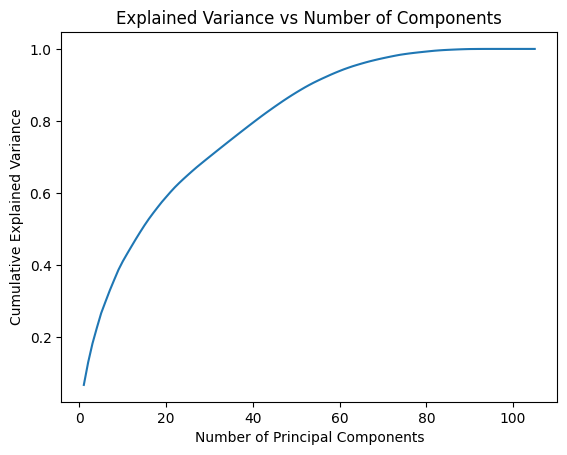

In [35]:
#Plotting PCA curve
pca=PCA(random_state=42)
X_pca=pca.fit_transform(X_train)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

- #### We observe that around 80 components are enough to capture most of the variance
- #### However, let us use Maximum Likelihood Estimator to decide the most optimum number of principal components automatically
- #### Let us also reconstruct the dataset using PCA

In [36]:
pca=PCA(n_components='mle')
X_train_pca=pca.fit_transform(X_train)
X_val_pca=pca.transform(X_val)
X_train_reconstructed=pca.inverse_transform(X_train_pca)
X_val_reconstructed=pca.inverse_transform(X_val_pca)
reconstruction_error_train=((X_train-X_train_reconstructed)**2).mean(axis=1)
reconstruction_error_val=((X_val-X_val_reconstructed)**2).mean(axis=1)
print("Number of Principal Components selected by Maximum Likelihood Estimator:",pca.n_components_)
print("Mean Squared Reconstruction Error for Train set:",reconstruction_error_train.mean())
print("Mean Squared Reconstruction Error for Validation set:",reconstruction_error_val.mean())

Number of Principal Components selected by Maximum Likelihood Estimator: 96
Mean Squared Reconstruction Error for Train set: 1.1768684368560564e-27
Mean Squared Reconstruction Error for Validation set: 3.436535803597066e-30


### Inference
- From the graph plotted we observe that the curve starts to flatten after 80 PCs
- Maximum Likelihood Estimator uses 96 components as optimum
- However, in practice, it was observed that PCA could not help us improve our model performance
- This is probably because of two reasons :
  1. The previous feature selection/extraction methods have already reduced the feature space and what remain now are all important
  2. Due to very high number of datapoints in our dataset, even minor reconstruction error and loss of variance results in huge impact on model performance
- Keeping all these in mind, the reconstructed dataset was not used for model training

# MODEL BUILDING AND EVALUATION
Models used are as follows :-
1. RandomForestClassifier
2. XGBClassifier
3. HistGradientBoostingClassifier
4. LGBMClassifier  
5. VotingClassifier (using LGBMClassifier and HistGradientBoostingClassifier)

## Model 1 : Random Forest Classifier

              precision    recall  f1-score   support

           0     0.6075    0.6089    0.6082      9878
           1     0.6175    0.6161    0.6168     10122

    accuracy                         0.6126     20000
   macro avg     0.6125    0.6125    0.6125     20000
weighted avg     0.6126    0.6126    0.6126     20000



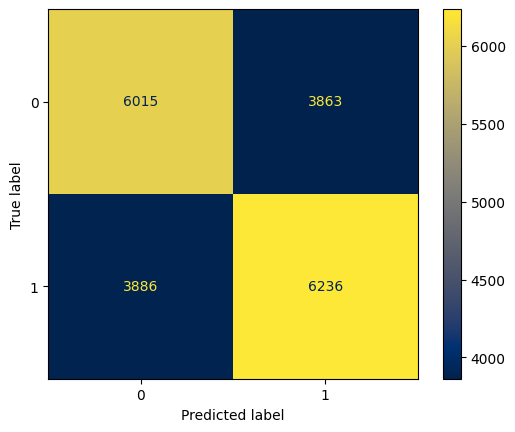

In [37]:
#Training and predicting using RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_val_pred_rf=rf.predict(X_val)
#Displaying classification report for RandomForestClassifier
print(classification_report(y_val,y_val_pred_rf,labels=rf.classes_,digits=4))
#Displaying confusion matrix for RandomForestClassifier
cm=confusion_matrix(y_val,y_val_pred_rf,labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_).plot(cmap='cividis')
plt.show()

## Model 2 : XGBoost Classifier

              precision    recall  f1-score   support

           0     0.6041    0.6406    0.6218      9878
           1     0.6273    0.5903    0.6082     10122

    accuracy                         0.6151     20000
   macro avg     0.6157    0.6155    0.6150     20000
weighted avg     0.6158    0.6151    0.6149     20000



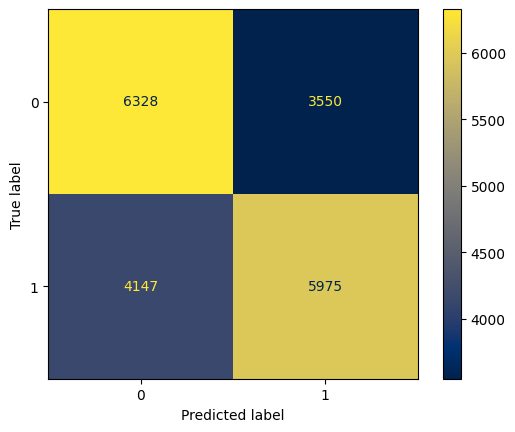

In [38]:
#Training and predicting using XGBClassifier
xgb=XGBClassifier(enable_categorical=True,random_state=42)
xgb.fit(X_train,y_train)
y_val_pred_xgb=xgb.predict(X_val)
#Displaying classification report for XGBClassifier
print(classification_report(y_val,y_val_pred_xgb,labels=xgb.classes_,digits=4))
#Displaying confusion matrix for XGBClassifier
cm=confusion_matrix(y_val,y_val_pred_xgb,labels=xgb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_).plot(cmap='cividis')
plt.show()

## Model 3 : Histogram Gradient Boosting Classifier

              precision    recall  f1-score   support

           0     0.6300    0.6032    0.6163      9878
           1     0.6282    0.6543    0.6410     10122

    accuracy                         0.6290     20000
   macro avg     0.6291    0.6287    0.6286     20000
weighted avg     0.6291    0.6290    0.6288     20000



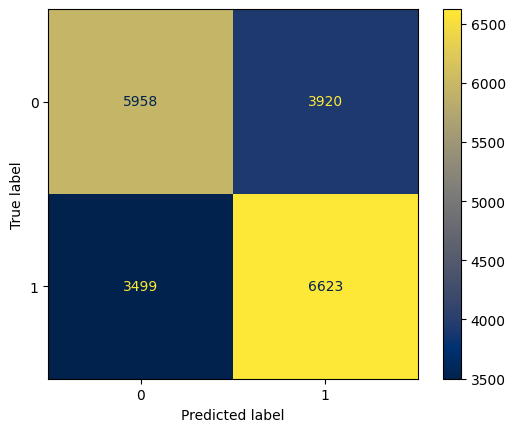

In [39]:
#Training and predicting using HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train,y_train)
y_val_pred_hgb=hgb.predict(X_val)
#Displaying classification report for HistGradientBoostingClassifier
print(classification_report(y_val,y_val_pred_hgb,labels=hgb.classes_,digits=4))
#Displaying confusion matrix for HistGradientBoostingClassifier
cm=confusion_matrix(y_val,y_val_pred_hgb,labels=hgb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=hgb.classes_).plot(cmap='cividis')
plt.show()

## Model 4 : LightGBM Classifier

              precision    recall  f1-score   support

           0     0.6284    0.6065    0.6172      9878
           1     0.6286    0.6500    0.6391     10122

    accuracy                         0.6285     20000
   macro avg     0.6285    0.6282    0.6282     20000
weighted avg     0.6285    0.6285    0.6283     20000



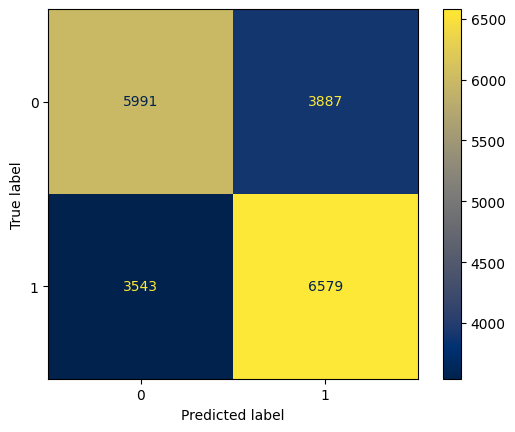

In [40]:
#Training and predicting using LGBMClassifier
lgb=LGBMClassifier(random_state=42,verbose=-1)
lgb.fit(X_train,y_train)
y_val_pred_lgb=lgb.predict(X_val)
#Displaying classification report for LGBMClassifier
print(classification_report(y_val,y_val_pred_lgb,labels=lgb.classes_,digits=4))
#Displaying confusion matrix for LGBMClassifier
cm=confusion_matrix(y_val,y_val_pred_lgb,labels=lgb.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgb.classes_).plot(cmap='cividis')
plt.show()

## Model 5 : Voting Classifier

              precision    recall  f1-score   support

           0     0.6324    0.6051    0.6184      9878
           1     0.6302    0.6567    0.6432     10122

    accuracy                         0.6312     20000
   macro avg     0.6313    0.6309    0.6308     20000
weighted avg     0.6312    0.6312    0.6309     20000



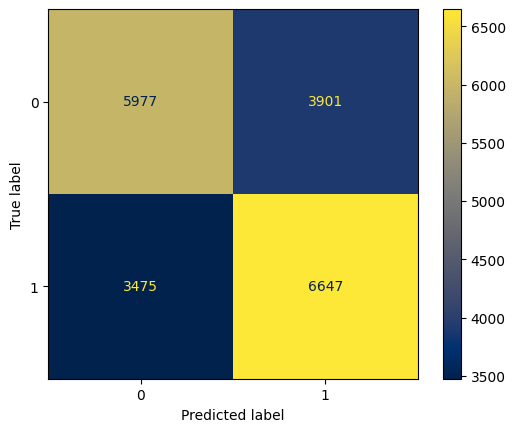

In [41]:
#Training and predicting using VotingClassifier
vc=VotingClassifier(estimators=[('lgb',lgb),('hgb',hgb)],voting='soft')
vc.fit(X_train,y_train)
y_val_pred_vc=vc.predict(X_val)
#Displaying classification report for VotingClassifier
print(classification_report(y_val,y_val_pred_vc,labels=vc.classes_,digits=4))
#Displaying confusion matrix for VotingClassifier
cm=confusion_matrix(y_val,y_val_pred_vc,labels=vc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=vc.classes_).plot(cmap='cividis')
plt.show()

## Model Comparison Using F1_Score

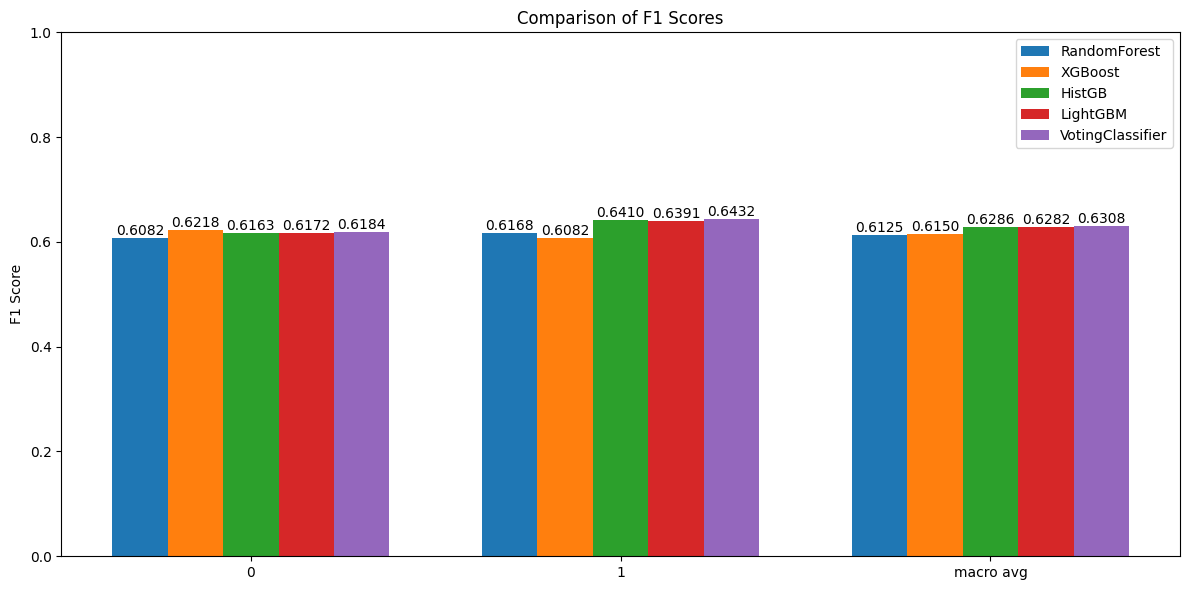

In [42]:
rf_details=classification_report(y_val,y_val_pred_rf,labels=rf.classes_,digits=4,output_dict=True)
xgb_details=classification_report(y_val,y_val_pred_xgb,labels=xgb.classes_,digits=4,output_dict=True)
lgb_details=classification_report(y_val,y_val_pred_lgb,labels=lgb.classes_,digits=4,output_dict=True)
hgb_details=classification_report(y_val,y_val_pred_hgb,labels=lgb.classes_,digits=4,output_dict=True)
vc_details=classification_report(y_val,y_val_pred_vc,labels=lgb.classes_,digits=4,output_dict=True)
rf_f1_0,rf_f1_1,rf_f1_mac=rf_details['0']['f1-score'],rf_details['1']['f1-score'],rf_details['macro avg']['f1-score']
xgb_f1_0,xgb_f1_1,xgb_f1_mac=xgb_details['0']['f1-score'],xgb_details['1']['f1-score'],xgb_details['macro avg']['f1-score']
lgb_f1_0,lgb_f1_1,lgb_f1_mac=lgb_details['0']['f1-score'],lgb_details['1']['f1-score'],lgb_details['macro avg']['f1-score']
hgb_f1_0,hgb_f1_1,hgb_f1_mac=hgb_details['0']['f1-score'],hgb_details['1']['f1-score'],hgb_details['macro avg']['f1-score']
vc_f1_0,vc_f1_1,vc_f1_mac=vc_details['0']['f1-score'],vc_details['1']['f1-score'],vc_details['macro avg']['f1-score']
labels=['0','1','macro avg']
rf_bars=[rf_f1_0, rf_f1_1, rf_f1_mac]
xgb_bars=[xgb_f1_0, xgb_f1_1, xgb_f1_mac]
hgb_bars=[hgb_f1_0, hgb_f1_1, hgb_f1_mac]
lgb_bars=[lgb_f1_0, lgb_f1_1, lgb_f1_mac]
vc_bars=[vc_f1_0, vc_f1_1, vc_f1_mac]
x=np.arange(len(labels))
width=0.15
fig,ax=plt.subplots(figsize=(12,6))
r1=ax.bar(x-2*width,rf_bars,width,label='RandomForest')
r2=ax.bar(x-width,xgb_bars,width,label='XGBoost')
r3=ax.bar(x,hgb_bars,width,label='HistGB')  
r4=ax.bar(x+width,lgb_bars,width,label='LightGBM')
r5=ax.bar(x+2*width,vc_bars,width,label='VotingClassifier')
ax.set_ylabel("F1 Score")
ax.set_title("Comparison of F1 Scores")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0,1)
for bars in [r1,r2,r3,r4,r5]:
    ax.bar_label(bars,fmt="%.4f")
plt.tight_layout()
plt.show()

### Inference
- XGBoost performs best for label 0 but its performance drops for label 1, causing a lower macro avg
- LGBM and HGB has almost similar performance with HGB performing slightly better
- We select the best two models - HGB and LGBM to fit Voting Classifier
- It is observed as expected that voting classifier performs the best and hence is selected as final model
- Since HGB and LGBM will be used inside Voting Classifier, it is important to tune the hyperparameter of these two models

# HYPERPARAMETER TUNING OF LIGHTGBM

## RandomizedSearchCV For First Layer of Hyperparameter Tuning

### Code :-

```python
lgb=LGBMClassifier(random_state=42, verbose=-1)
param_dist={'num_leaves': np.arange(20, 150, 10),
            'max_depth': np.arange(3, 15, 1),
            'learning_rate': np.linspace(0.01, 0.3, 10),
            'n_estimators': np.arange(100, 1000, 100),
            'min_child_samples': np.arange(5, 100, 5),
            'feature_fraction': np.linspace(0.5, 1.0, 10),
            'bagging_fraction': np.linspace(0.5, 1.0, 10),
            'bagging_freq': np.arange(1, 10, 1),
            'lambda_l1': np.logspace(-3, 1, 10),
            'lambda_l2': np.logspace(-3, 1, 10),
            'min_split_gain': np.linspace(0, 0.5, 10)}
random_search=RandomizedSearchCV(estimator=lgb,
                                 param_distributions=param_dist,
                                 scoring='accuracy',
                                 n_iter=100,  
                                 cv=5,  
                                 verbose=0,
                                 random_state=42,
                                 n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_params_

### Output :-

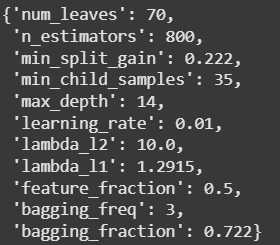
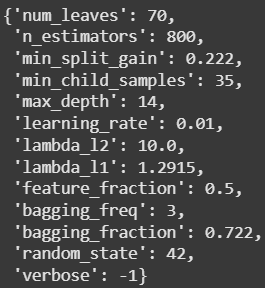

### Classification report for best parameter using RandomizedSearchCV

### Code:-

```python
y_pred_random_lgb=random_search.predict(X_val)
print(classification_report(y_val,y_pred_random_lgb))

### Output:-

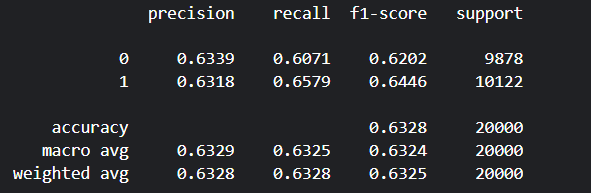
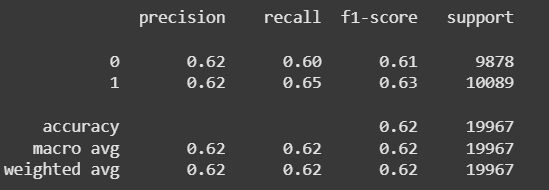

## GridSearchCV For Deeper Hyperparameter Tuning

### Code:-

```python
best_params=random_search.best_params_
param_grid={'num_leaves': [best_params['num_leaves'] - 10, best_params['num_leaves'], best_params['num_leaves'] + 10],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'learning_rate': [best_params['learning_rate'] * 0.8, best_params['learning_rate'], best_params['learning_rate'] * 1.2],
    'n_estimators': [best_params['n_estimators'] - 100, best_params['n_estimators'], best_params['n_estimators'] + 100],
    'min_child_samples': [best_params['min_child_samples'] - 5, best_params['min_child_samples'], best_params['min_child_samples'] + 5],
    'min_split_gain': [best_params['min_split_gain']],
    'lambda_l2': [best_params['lambda_l2']],
    'lambda_l1': [best_params['lambda_l1']],
    'feature_fraction': [best_params['feature_fraction']],
    'bagging_freq': [best_params['bagging_freq']],
    'bagging_fraction': [best_params['bagging_fraction']]}
grid_search = GridSearchCV(estimator=lgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=0,
                           n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

### Output:-

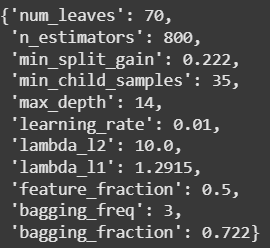
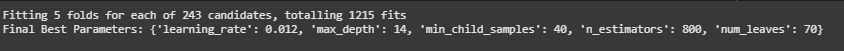

### Classification report for best parameter using GridSearchCV

### Code:-

```python
y_pred_grid_lgb=grid_search.predict(X_val)
print(classification_report(y_val,y_pred_grid_lgb))

### Output:-

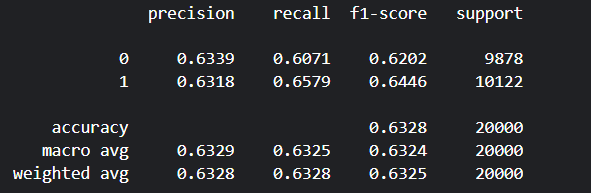
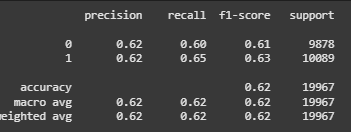

# HYPERPARAMETER TUNING OF HGBCLASSIFIER

## Code:-

```python
hgb=HistGradientBoostingClassifier(random_state=42)
param_dist={"learning_rate": uniform(0.0001, 0.3),
            "max_iter": randint(100, 3000),
            "max_depth": randint(-1, 20),
            "min_samples_leaf": randint(1, 100),
            "max_bins": randint(2, 2048),
            "l2_regularization": uniform(1e-10, 1e1)}
random_search=RandomizedSearchCV(estimator=hgb,
                                 param_distributions=param_dist,
                                 n_iter=1000,
                                 scoring="accuracy",
                                 n_jobs=-1,
                                 cv=5,
                                 random_state=42)
random_search.fit(X_train, y_train)
random_search.best_params_

## Output:-

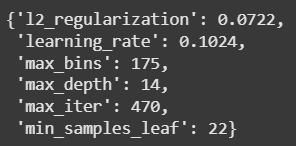

## Classification report for best parameter

### Code:-

```python
y_pred_hgb=random_search.predict(X_val)
print(classification_report(y_val,y_pred_hgb))

### Output:-

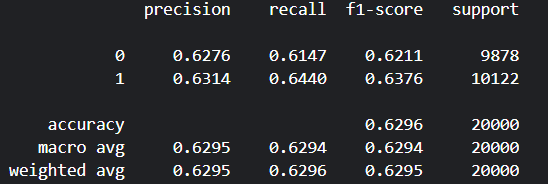
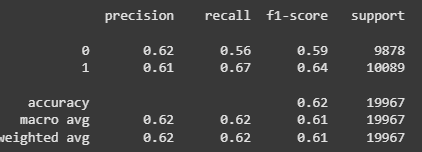

### Inference
- Hyper-parameter tuning was first performed using RandomizedSearch and then using GridSearch for LightGBM
- Validation set performance of RandomizedSearch and GridSearch had no difference for LightGBM
- Hyper-parameter tuning was only performed with RandomizedSearch for HGBClassifier as GridSearch was computationally very expensive while not improving score significantly
- Model performance improvements are clearly visible from classification report after hyperparameter tuning

# FINAL PREDICTION AND SUBMISSION

#### For the final prediction of test dataset, we will preprocess and fit the model using the whole train set (training+validation set) so that it can capture more variance and perform better

In [43]:
#Applying preprocessing
X=preprocessor.fit_transform(X)
df_test=preprocessor.transform(df_test)
#Applying feature selection
X=selector.fit_transform(X)
df_test=selector.transform(df_test)
X.shape,df_test.shape

((100000, 105), (10000, 105))

In [44]:
#Training and predicting using final model
lgb=LGBMClassifier(num_leaves=70,n_estimators=800,min_split_gain=0.222,min_child_samples=35,max_depth=14,learning_rate=0.01,lambda_l2=10.0,
                   lambda_l1=1.2915,feature_fraction=0.5,bagging_freq=3,bagging_fraction=0.722,random_state=42,verbose=-1)
hgb=HistGradientBoostingClassifier(l2_regularization=0.0722,learning_rate=0.1024,max_bins=175,max_depth=14,max_iter=470,
                                   min_samples_leaf=22,random_state=42)
vc=VotingClassifier(estimators=[('lgb',lgb),('hgb',hgb)],voting='soft')
vc.fit(X,y)
y_pred=vc.predict(df_test)
print("Final Prediction Successful")

Final Prediction Successful


In [45]:
submission=pd.DataFrame({"id":range(0,df_test.shape[0]),
                         "target":y_pred})
submission.to_csv("submission.csv",index=False)
print("Final Submission Successful")

Final Submission Successful


### Inference
- The whole training data has been preprocessed along with the whole test data for the purpose of final prediction and submission
- This way, model was able to generalize better due to more training examples and produce better results
- Our final test best score was found to be 0.63820